In [1]:
import os
import h5py
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.transforms as transforms

## Particle deflection calculation
The magnet will deflect an electron of momentum $p$ (in eV/c) according to:

$\theta = \frac{cBd}{p}$

where $Bd$ is the integrated field of the magnet. The horizontal displacement from the beam a distance $l$ down the beamline will be

$\Delta x = l\cdot\tan\theta = l\cdot\tan\Bigr(\frac{cBd}{p}\Bigr)$.

The integrated field for our magnet is $Bd = 0.23\,T\cdot m$.

In [2]:
# Hodoscope parameters
hodo_x_len = 4.2   # Length in x (transverse) direction (cm)
hodo_z_len = 2.0   # Length in z (downstream) direction (cm)
hodo_x_sep = 7.55  # Separation in x (transverse) direction (cm)
hodo_z_sep = 17.0  # Separation in z (downstream) direction (cm)

# Hodoscope positions from MC (in cm)
hodoscope_positions = { 0: (86.9258, 183.884),
                        1: (87.5694, 202.285),
                        2: (79.411,  185.779),
                        3: (80.0546, 204.18),
                        4: (71.8963, 187.674),
                        5: (72.5398, 206.075),
                        6: (64.3815, 189.569),
                        7: (65.025, 207.97),
                        8: (56.8667, 191.464),
                        9: (57.5102, 209.865),
                       10: (49.3519, 193.359),
                       11: (49.9954, 211.76),
                       12: (41.8371, 195.253),
                       13: (42.4806, 213.655),
                       14: (34.3223, 197.148)}

# location of end of magnet in MC (in cm)
end_of_magnet_offset = 7.5

# Constants and field
c = 2.99792458e8
Bd = 0.23

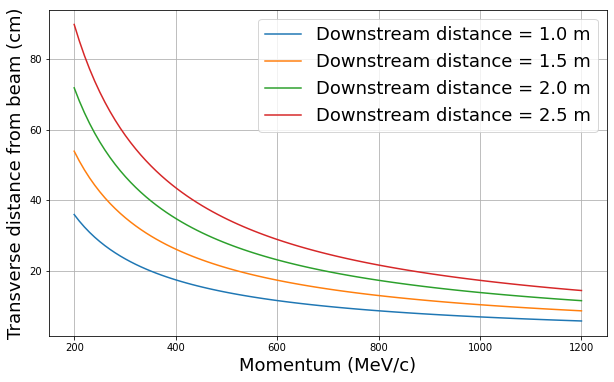

In [3]:
# Momentum values (in MeV/c)
p_values = np.linspace(200, 1200, 100)

# Downstream distances (in m)
l_values = np.arange(1.0, 2.6, 0.5)

plt.figure(figsize=(10, 6))
for l in l_values:
    
    # Calculate the transverse distance (in m)
    dX_values = l * np.tan(Bd / (p_values * 1e6 / c)) * 100

    # Plot dX vs p for this l
    plt.plot(p_values, dX_values, label=f'Downstream distance = {l:.1f} m')
    
plt.ylabel("Transverse distance from beam (cm)",fontsize=18)
plt.xlabel("Momentum (MeV/c)",fontsize=18)
plt.legend(fontsize=18)
plt.grid()

## Rotated hodoscope orientation

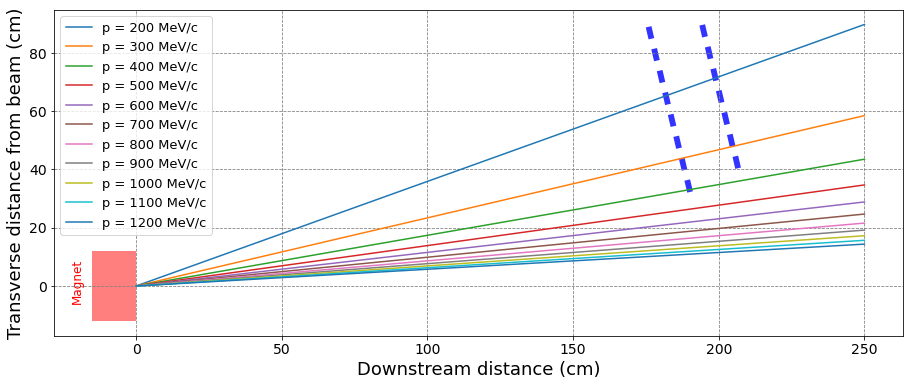

In [4]:
fig, ax = plt.subplots(figsize=(18, 6))
fig.set_facecolor('white')

l_max = 250
xdist_hodoscope = 35.0

# Momentum range in GeV/c
p_values = np.linspace(200, 1200, 11)
p_start = p_values[0]
p_stop = p_values[-1]
p_step = p_values[1]-p_values[0]

# Loop over the momentum values
for p in p_values:
    
    # Calculate the angle at which the particle exits the magnetic field
    theta = Bd / (p * 1e6 / c)

    # Calculate the transverse distance (in m) at a range of downstream distances
    l_values = np.linspace(0, l_max, 100)
    dX_values = l_values * np.tan(theta)

    # Plot dX vs l for this momentum
    ax.plot(l_values, dX_values, label=f'p = {p:.0f} MeV/c')
    
# Add hodoscope elements and labels
labels_8 = [14, 12, 10, 8, 6, 4, 2, 0]
labels_7 = [13, 11, 9, 7, 5, 3, 1]

for i in range(8):  # First row
    #     ax.add_patch(patches.Rectangle((l_hodoscope, xdist_hodoscope + i*hodo_x_sep),
    #                                    hodo_z_len, hodo_x_len, facecolor='blue', alpha=0.8))
    
    # Create a rectangle patch
    draw_x = hodoscope_positions[labels_8[i]][1] - end_of_magnet_offset - hodo_z_len/2
    draw_y = hodoscope_positions[labels_8[i]][0] - hodo_x_len/2
    rectangle = patches.Rectangle((draw_x, draw_y),
                                  hodo_z_len, hodo_x_len, facecolor='blue', alpha=0.8)
    ax.add_patch(rectangle)
    
    # Rotate the rectangle
    center_x = draw_x + hodo_z_len/2
    center_y = draw_y + hodo_x_len/2
    rotation = transforms.Affine2D().rotate_deg_around(center_x, center_y, np.degrees(0.23))
    rectangle.set_transform(rotation + ax.transData)

    #ax.text(l_hodoscope + 4.5*hodo_z_len/2, xdist_hodoscope + i*hodo_x_sep + hodo_x_len/2, str(labels_8[i]),
    #        color='black', ha='center', va='center')

for i in range(7):  # Second row
    
    # Create a rectangle patch
    draw_x = hodoscope_positions[labels_7[i]][1] - end_of_magnet_offset - hodo_z_len/2
    draw_y = hodoscope_positions[labels_7[i]][0] - hodo_x_len/2
    rectangle = patches.Rectangle((draw_x, draw_y),
                                  hodo_z_len, hodo_x_len, facecolor='blue', alpha=0.8)
    ax.add_patch(rectangle)
    
    # Rotate the rectangle
    center_x = draw_x + hodo_z_len/2
    center_y = draw_y + hodo_x_len/2
    rotation = transforms.Affine2D().rotate_deg_around(center_x, center_y, np.degrees(0.23))
    rectangle.set_transform(rotation + ax.transData)

    #ax.add_patch(patches.Rectangle((l_hodoscope + hodo_z_sep/2, xdist_hodoscope + hodo_x_sep/2 + i*hodo_x_sep),
    #                               hodo_z_len, hodo_x_len, facecolor='blue', alpha=0.8))
    #ax.text(l_hodoscope + 1.5*hodo_z_sep/2 + hodo_z_len/2, xdist_hodoscope + hodo_x_sep/2 + i*hodo_x_sep + hodo_x_len/2, str(labels_7[i]),
    #        color='black', ha='center', va='center')

# Add gridlines
ax.grid(True, which='both', color='gray', linestyle='--')

# Add a legend
ax.legend(fontsize=13)

# Add labels and title
ax.set_xlabel('Downstream distance (cm)',fontsize=18)
ax.set_ylabel('Transverse distance from beam (cm)',fontsize=18)
#ax.set_title('Approx. electron trajectories for different momenta',fontsize=18)

# Equal aspect ratio
ax.set_aspect('equal')

# Add a small box representing the magnet at the origin and label it
ax.add_patch(patches.Rectangle((-15, -12), 15, 24, facecolor='red', alpha=0.5))
ax.text(-22.5, -5, 'Magnet', fontsize=12, color='red',rotation=90)

# Set larger tick marks
ax.tick_params(axis='both', which='major', labelsize=14)

plt.savefig("electron_trajectories.png", bbox_inches='tight')

### Calculation of energy for each hodoscope position

In [5]:
momenta_c = {}
momenta_l, momenta_r = {}, {}
momenta_delta = {}
for elem, (x, z) in hodoscope_positions.items():

    z -= end_of_magnet_offset
    
    # Calculate the angle theta
    theta_c = np.arctan2(x, z)
    theta_l = np.arctan2(x, z+hodo_x_len/2)
    theta_r = np.arctan2(x, z-hodo_x_len/2)

    # Calculate the momentum in GeV/c
    p_c = Bd * c / theta_c / 1e9  # convert to GeV/c from kg*m/s
    p_l = Bd * c / theta_l / 1e9
    p_r = Bd * c / theta_r / 1e9
    
    # Store the calculations
    momenta_c[elem] = p_c
    momenta_l[elem] = p_l
    momenta_r[elem] = p_r
    momenta_delta[elem] = p_l - p_r

In [6]:
print("Approx. momentum range due to size of hodoscope elements:")
for elem in momenta_c.keys():
    p_deltac = momenta_delta[elem]/momenta_c[elem]
    print("-- Elem {}, range = {}, range/mean = {}".format(elem,momenta_delta[elem],p_deltac))

Approx. momentum range due to size of hodoscope elements:
-- Elem 0, range = 0.0031051281139485853, range/mean = 0.020620084737437084
-- Elem 1, range = 0.003114919302005442, range/mean = 0.01908625600629431
-- Elem 2, range = 0.0034382955838926366, range/mean = 0.020895767276068258
-- Elem 3, range = 0.0034408819264981905, range/mean = 0.019289850047267344
-- Elem 4, range = 0.0038381271425452224, range/mean = 0.021134161379157294
-- Elem 5, range = 0.0038316739460842186, range/mean = 0.019462881964605386
-- Elem 6, range = 0.004327591713230411, range/mean = 0.02133207449548016
-- Elem 7, range = 0.004309503367494583, range/mean = 0.019603403512624434
-- Elem 8, range = 0.004941827153372019, range/mean = 0.02148684410753851
-- Elem 9, range = 0.0049082258326052786, range/mean = 0.019709866347622527
-- Elem 10, range = 0.005737451010544847, range/mean = 0.02159646290660157
-- Elem 11, range = 0.005682106590518321, range/mean = 0.019781172548900987
-- Elem 12, range = 0.0068118556137202

In [7]:
momenta_delta

{0: 0.0031051281139485853,
 1: 0.003114919302005442,
 2: 0.0034382955838926366,
 3: 0.0034408819264981905,
 4: 0.0038381271425452224,
 5: 0.0038316739460842186,
 6: 0.004327591713230411,
 7: 0.004309503367494583,
 8: 0.004941827153372019,
 9: 0.0049082258326052786,
 10: 0.005737451010544847,
 11: 0.005682106590518321,
 12: 0.006811855613720219,
 13: 0.006723880407884519,
 14: 0.008347864712857922}

## Old code

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8.0))

l_max = 250
l_hodoscope = 200
xdist_hodoscope = 35.0

# Momentum range in GeV/c
p_values = np.linspace(200, 1200, 11)
p_start = p_values[0]
p_stop = p_values[-1]
p_step = p_values[1]-p_values[0]

# Loop over the momentum values
for p in p_values:
    
    # Calculate the angle at which the particle exits the magnetic field
    theta = Bd / (p * 1e6 / c)

    # Calculate the transverse distance (in m) at a range of downstream distances
    l_values = np.linspace(0, l_max, 100)
    dX_values = l_values * np.tan(theta)

    # Plot dX vs l for this momentum
    ax.plot(dX_values, l_values, label=f'p = {p:.1f} MeV/c')
    
# Add hodoscope elements 
for i in range(8):  # First row
    ax.add_patch(patches.Rectangle((xdist_hodoscope + i*hodo_x_sep, l_hodoscope),
                                   hodo_x_len, hodo_z_len, facecolor='blue', alpha=0.8))

for i in range(7):  # Second row
    ax.add_patch(patches.Rectangle((xdist_hodoscope + hodo_x_sep/2 + i*hodo_x_sep, l_hodoscope + hodo_z_sep/2),
                                   hodo_x_len, hodo_z_len, facecolor='blue', alpha=0.8))

# Add gridlines
ax.grid(True, which='both', color='gray', linestyle='--')

# Add a legend
ax.legend()

# Add labels and title
ax.set_xlabel('Transverse distance from beam (cm)',fontsize=18)
ax.set_ylabel('Downstream distance (cm)',fontsize=18)
ax.set_title('Approx. electron trajectories for different momenta',fontsize=18)